### Step 1: Import necessary libraries

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2

### Step 2: Load and preprocess the CIFAR-10 dataset

In [54]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [55]:
# One-hot encode the labels correctly
train_labels = to_categorical(train_labels, num_classes=10)  # Ensure 10 classes for CIFAR-10
test_labels = to_categorical(test_labels, num_classes=10)    # Ensure 10 classes for CIFAR-10



Text(0.5, 1.0, 'First Image in CIFAR-10 Dataset')

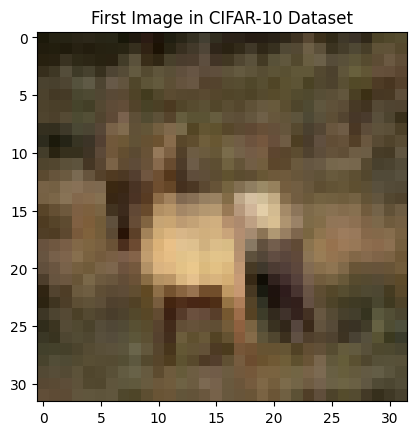

In [56]:
# Visulize the Image From The Dataset
plt.imshow(train_images[3])
plt.title("First Image in CIFAR-10 Dataset")

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# One-hot encode the labels correctly
train_labels = to_categorical(train_labels, num_classes=10)  # Ensure 10 classes for CIFAR-10
test_labels = to_categorical(test_labels, num_classes=10)    # Ensure 10 classes for CIFAR-10

# Load the MobileNetV2 model pre-trained on ImageNet, excluding the top (classification) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model's layers to prevent them from being trained
base_model.trainable = False

# Create a new model with the base model followed by custom layers for CIFAR-10 classification
model = models.Sequential([
    # Step 1: Base model (pre-trained MobileNetV2)
    base_model,

    # Step 2: Flatten the output of the base model
    layers.Flatten(),

    # Step 3: Fully connected layer
    layers.Dense(64, activation='softmax'),

    # Step 4: Output layer (for 10 classes in CIFAR-10)
    layers.Dense(10)
])

#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#train the model
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

# Unfreeze the base model and fine-tune the entire model (optional, for improved accuracy)
# You can fine-tune a few layers of MobileNetV2 by unfreezing them
base_model.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

C:\Users\ravia\AppData\Local\Temp\ipykernel_4916\4168413090.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10), output.shape=(None, 10)